# Import relevant packages 

In [29]:
# The function which will generate the random set of datapoints 
# and will distribute them into a specified number of classes
from sklearn.datasets import make_blobs

# A module for handling data
import pandas as pd

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The K-nearest neighbors classifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier

# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

# A class that would help us find the best model from a specified set of models.
from sklearn.model_selection import GridSearchCV

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time

# The Python package for scientific computing
import numpy as np

# K-Nearest Neighbours Classifier - The Random Dataset

## importing the necessary libraries 

In [2]:
from sklearn.datasets import make_blobs
# make_lobs normally distributed points arround a specified center and returns 2 arrays one for coordinated and one for labels 

## Generating the database 

In [3]:
inputs,target=make_blobs(n_samples=1000,
                        centers = [(-3, 3), (0, 0), (2, 2)], 
                            random_state = 365)

In [4]:
inputs.shape,target.shape

((1000, 2), (1000,))

In [5]:
data=pd.DataFrame(data=inputs,columns=['Feature 1','Feature 2'])
data['Target']=target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


## Plotting the database 

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

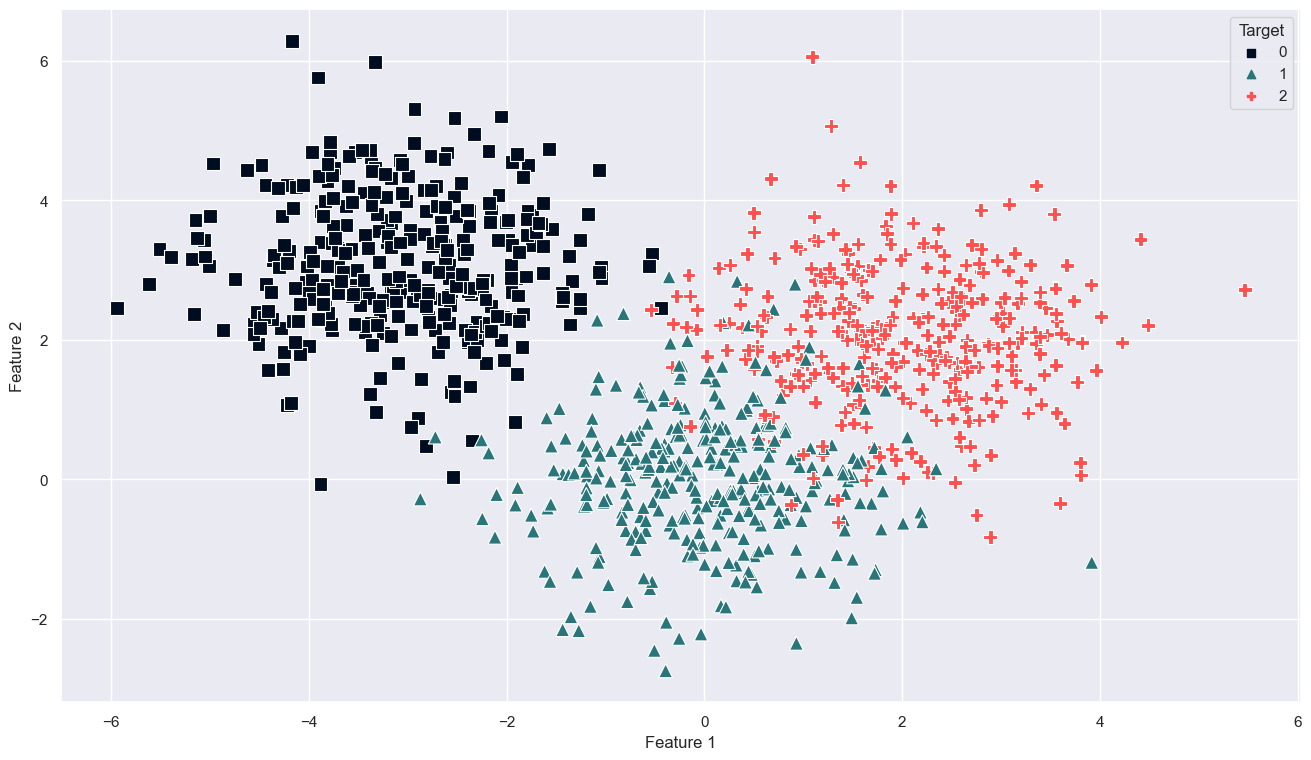

In [6]:
# Create a color palette
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
sns.set()
plt.figure(figsize=(16,9))
sns.scatterplot(x='Feature 1',y='Feature 2',data=data , hue='Target',palette=knn_palette,markers = [',', '^', 'P'],
                style = 'Target', 
                s = 100 )


In [7]:
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

## Lovely trick using sea born 

## visualizing the distribution of the points 

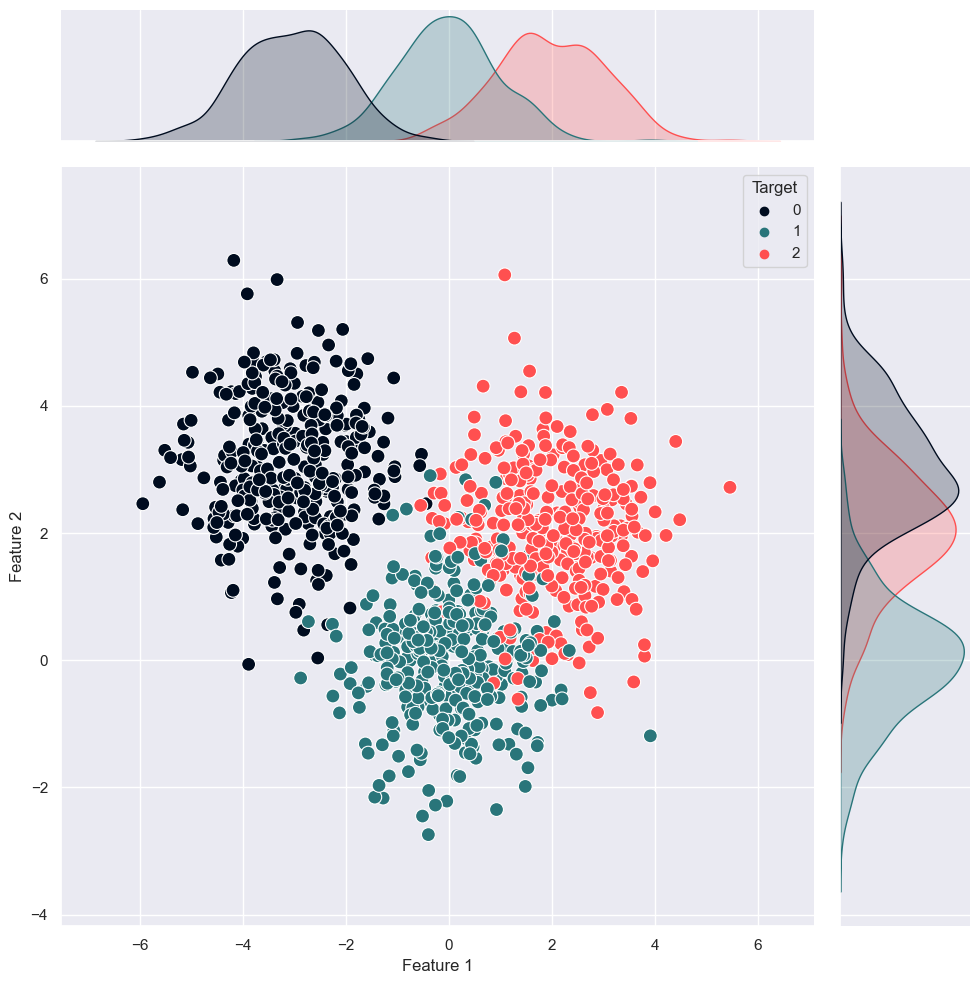

In [8]:
# Apply the seaborn style
sns.set()

# Create a seaborn jointplot.
sns.jointplot(x = 'Feature 1', y = 'Feature 2', 
              data = data, 
              hue = 'Target', 
              palette = knn_palette,
              height = 10,
              s = 100, 
              legend = True)

## Creating the train and test split 

In [9]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=365,stratify=target)

## Creating the model 

In [10]:
clf=KNeighborsClassifier(n_neighbors=30,weights='uniform')

clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

## Predicting a sample 

In [11]:
feature_1= -0.18
feature_2= 3.2

In [12]:
clf.predict([[feature_1,feature_2]])


array([2])

In [13]:
neighors=clf.kneighbors([[feature_1,feature_2]])
neighors


(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]], dtype=int64))

In [134]:
# first array show the euclidienne distance between the point 0 and nearest neighbor 
# the second array stors the index of the neighbor in the training set 

## Visualizing the neighbors

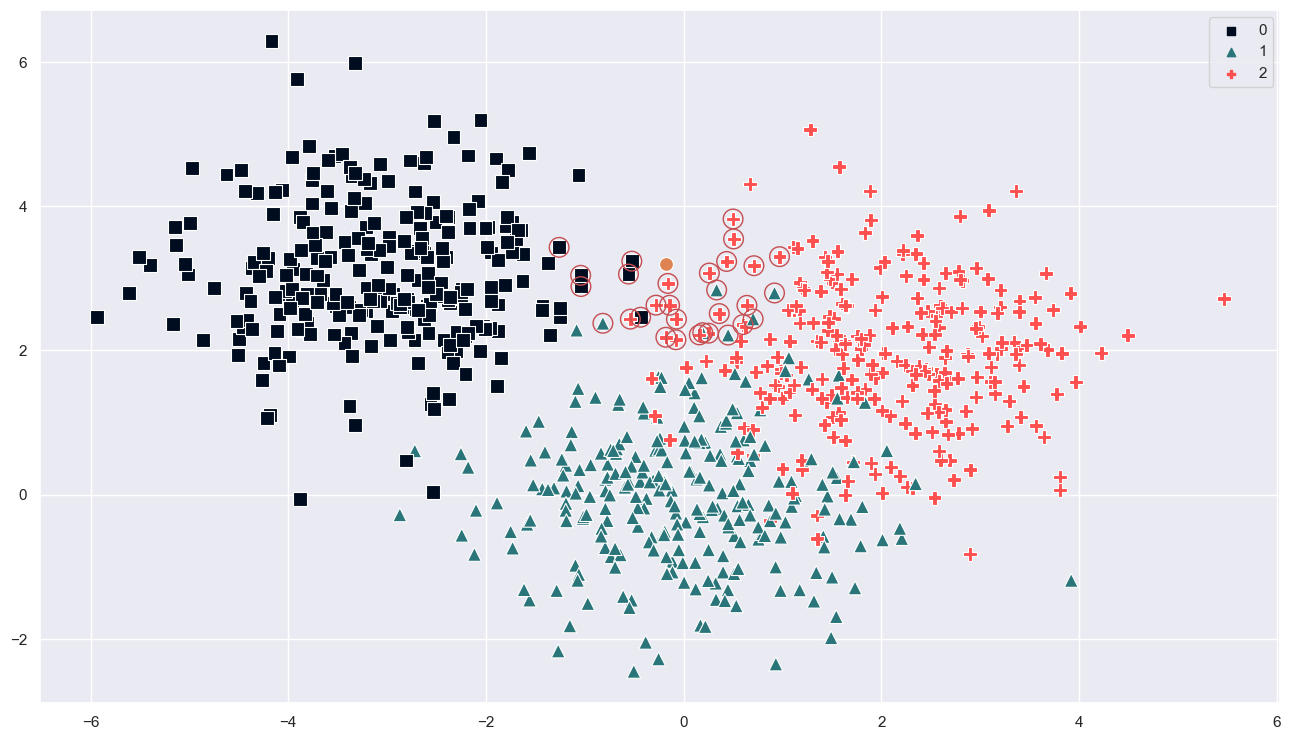

In [14]:
# Apply the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

# Plot the datapoints from the training data
sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train, 
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = y_train, 
                s = 100, 
                legend = True);

# Plot the point to be predicted
sns.scatterplot(x = [feature_1], y = [feature_2], 
                style = [feature_2],
                markers = ['o'],
                s = 100,
                legend = False);

# A list to store the x-values of all neighbors
plot_x_train = []
# A list to store the y-values of all neighbors
plot_y_train = []

# Append all x- and y-values to the respective lists
for i in neighors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

# Enclose all nearest neighbors
plt.scatter(plot_x_train, 
            plot_y_train, 
            s=200, facecolors='none', edgecolors='r');

In [15]:
# lets understand why the point belongs tp squard and not triangle 

## Getting the parameters of the model 

In [16]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

In [17]:
# its because it returned the smallest index rather than distance 
# to fix that through making in clf ( weight='distance')

# Decision region 

In [18]:
from mlxtend.plotting import plot_decision_regions 

## Drawing the decision regions 

In [19]:
x_train.shape

(800, 2)

Time elapsed: 79.9 seconds


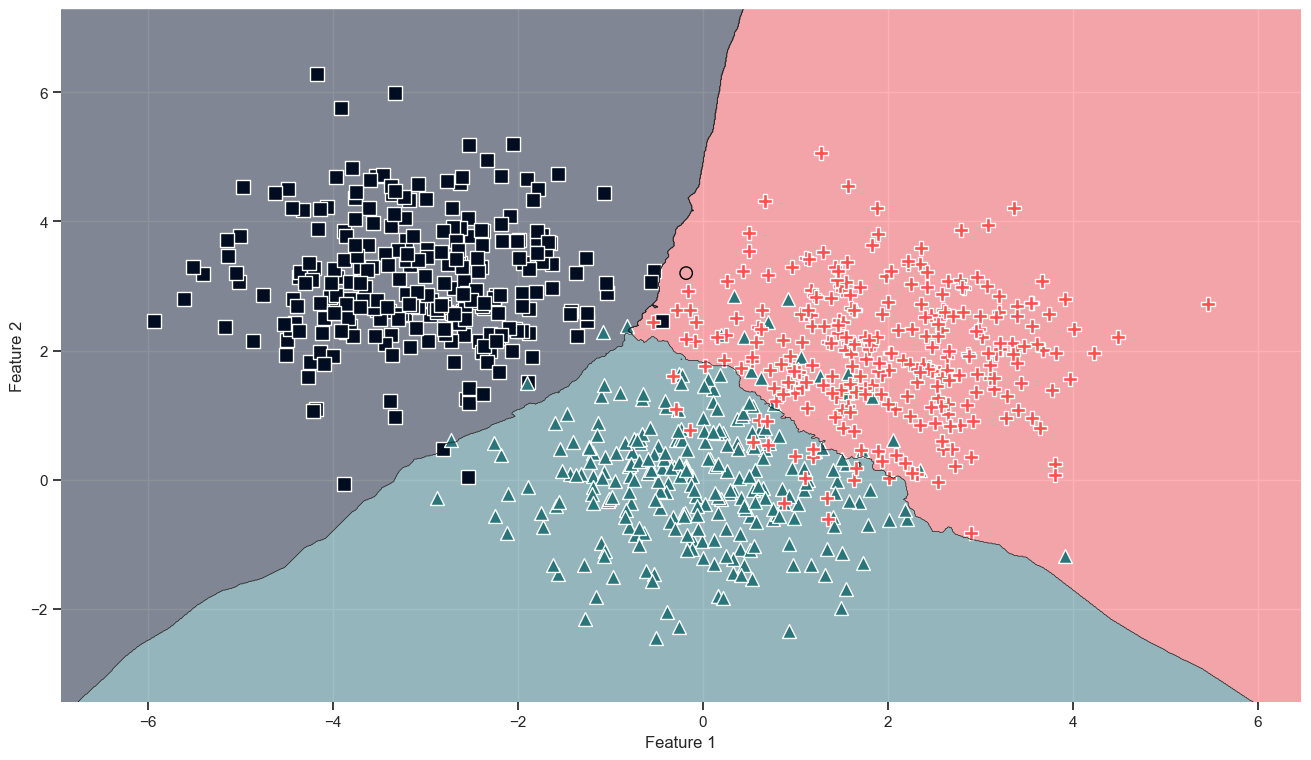

In [20]:
# Store the time at which the operation has begun
import time
start = time.time()

plt.figure(figsize = (16, 9))
# Plot the decision regions.
# The 'X' and 'y' parameters are the x- and y-coordinates of the training data.
# 'X_highlight' represents a datapoint which we want to highlight - in this case,
# the sample whose class we want to predict.
# Choose the classifier with the 'clf' parameter
# With 'markers' and 'colors' we choose the shape and color of each datapoint.
# With 'scatter_kwargs' we list additional parameters in the form of a dictionary.
# In our case, these are size of the datapoints, the color of their edges, as well as
# the transparacy.
# legend = 0 hides the legend.
plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)
# Give labels to the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

# Store the time at which the operation has ended
end = time.time()

# Print the difference between the two times
print(f'Time elapsed: {round(end - start, 1)} seconds')

In [21]:
# k=1 is rarely a good choice , sensitive to changes in the training data 
# it will cause overfit 
# poor performances on new datasets 
# low bias , high variance 

In [22]:
# k=30 
# smoother decision boundries 
# model not affected by background noise
# model not affected by new data points 

# BUT 
# tendency to misclassify points  
# low variance , high bias

# To determine the k-value

In [ ]:
# one approach is to analayse missclassified Data points as the value of K increseas 
# this metric is called missclassification rate = 1-accuracy 
# we will refer to it as the error rate 

## import the relevent package 

In [144]:
from sklearn.metrics import accuracy_score

## Getting the error rates of a set of models 

In [25]:
# Create empty lists which will store the error rates for models with
# uniform or distance weights.
error_uniform = []
#store error rates from models with uniformly distributed weights
error_distance = []
#store error rates from models with distance-based weights

# The range of K-values we will cover
k_range = range(1, 51)

# For each K value, create a classifier with both type of weights.
# In both cases, fit the model to the trining data.
# Make predictions on the test data.
# Append the error rate as 1-accuracy.
for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

## Plotting the error rates as a function of the number of neighbors

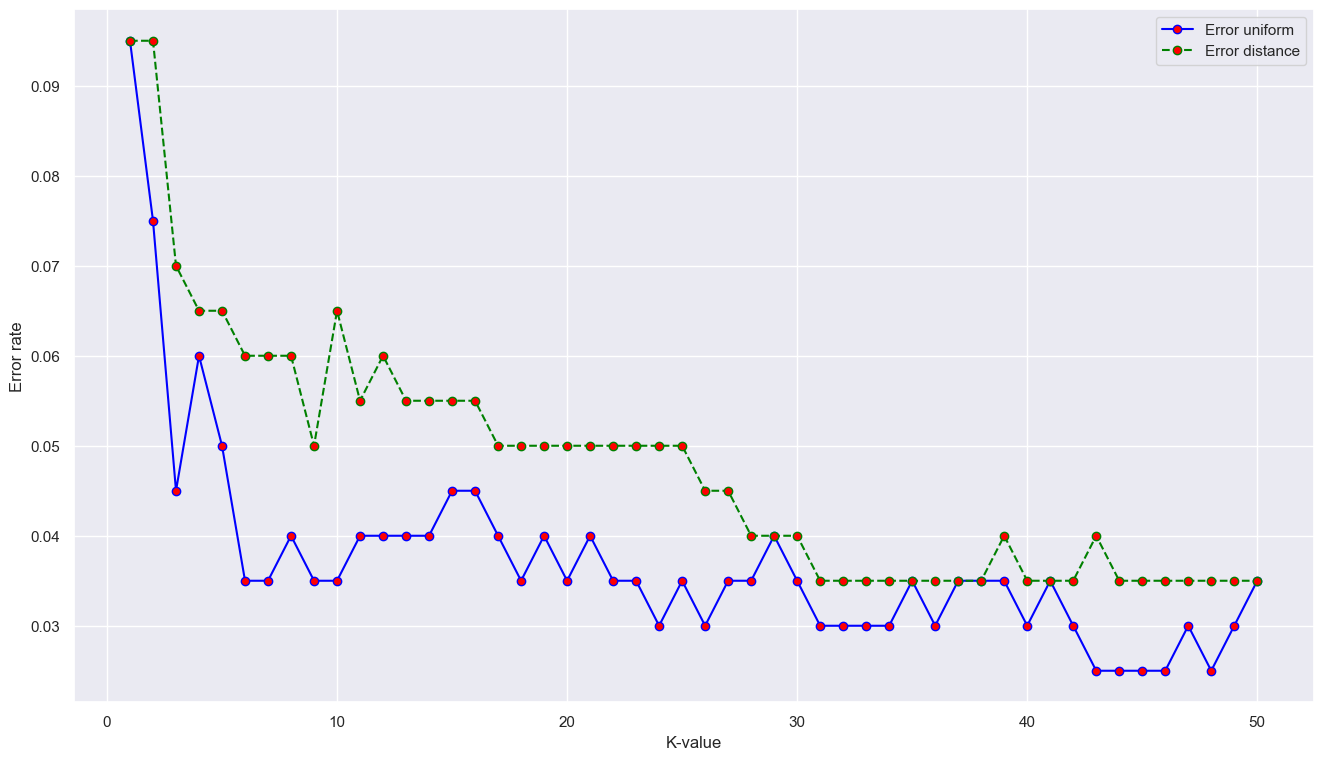

In [26]:
plt.figure(figsize = (16, 9))

# Plot the error rates.
# The models with uniform weights are plotted with a solid blue line.
# The models with distance weights are plotted with a dashed green line.
# The circular markers mark the distinct K-values.
plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

In [ ]:

# before we plot this we :
#1 created a model 
#2 fit the model to the training data 
#3 made predicitions on the test data 
#4 calculated the missclassification rate 

In [ ]:
# on the x we have the k values from 1 to 5  
# on the y we have the error rates 

In [ ]:
# to determine the k value we must take in consdiration:
#avoid small value bc of high variance 
#avoid big value cause it results high bias 
# and take a value of k where the error rate is small 

In [ ]:
# remark: 
#1\ we notice that the solide sits below the dashed one this suggests that a uniform distribution of the weights results 
# in a lower missclassification rate.

# 2\ the numbers on the y are already small so any value of k would do the job 

## SKLEARN technique to choose the right value of k

### Choosing a set of parameters to test

In [30]:
# Choose a set of parameters to test in the form of a dictionary.
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

## Create an instance of the GridSearchCV class 

In [31]:
# Create an instance of the GridSearchCV class.
# We choose KNeighborsClassifier as an estimator.
# Choose the dictionary of parameters we want to cover.
# Choose a scoring metric. I have decided to go with accuracy.
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')

In [32]:
# Fit all models to the training data and choose the best one based on the highes accuracy.
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
# Return the parameters of the best model
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [34]:
# Make 'clf' an instance of the best model.
clf = grid_search.best_estimator_

In [36]:
clf 

KNeighborsClassifier(n_neighbors=10)

In [37]:
# Display the score obtained by the best model.
grid_search.best_score_

#this is the mean of all accuracies obtained during cross-validation 

0.9512499999999999

# Make predictions on the test dataset

In [38]:
# Predict the classes of the samples in the test dataset using the best model.
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

## construct the confusion matrix 

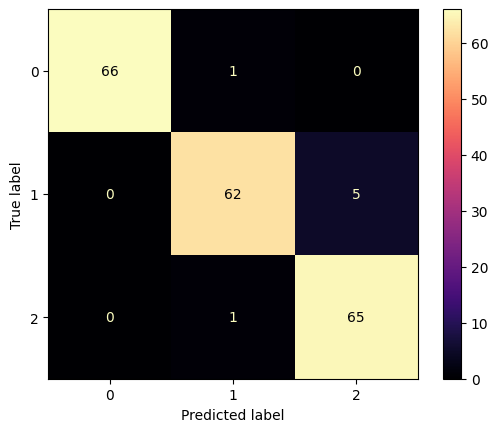

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
# Removing the seaborn visualization removes the white lines that come with it.
sns.reset_orig()
# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);
plt.show()

In [49]:
# the diagnoal is bright which means it has many correctly identified data points 
# the dimension is 3*3 because we have 3 classes 
# 0 for squares , 1 for triangles , and 2 for pluses 

## Print out the classification report 

In [55]:
# Print the classifcation report
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [ ]:
# precision = TP/TP+FP
# for class 2  precision=65/65+5+0

In [ ]:
# recall = TP/TP + FN 
# for class 2  recall = 65/65+1+0

In [ ]:
# f1-score=2/(1/precision)+(1/recall)